In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
%matplotlib inline

In [323]:
transactions = pd.read_csv("exp01.csv",skiprows=1,sep=";")

In [324]:
transactions.describe()

,time,transaction,price,volume
count,14006.000000,14006.00000,1.400600e+04,14006.000000
mean,25246.305155,7003.50000,7.651794e+10,8.624375
std,14495.558471,4043.32827,2.443035e+11,19.892408
min,250.000000,1.00000,1.096000e+02,1.000000
25%,12750.000000,3502.25000,1.782144e+04,1.000000
50%,25250.000000,7003.50000,7.155531e+06,1.000000
75%,37750.000000,10504.75000,2.888575e+09,1.000000
max,50000.000000,14006.00000,1.165445e+12,100.000000


In [325]:
#Convert time to days
transactions.loc[:,'time'] //= 200

In [326]:
df = transactions[['time','price','volume']]

In [327]:
#Convert it to "long-form" or "tidy" representation
df = pd.melt(df, id_vars=["time"], var_name="condition")

'# Calculate the 25th and 75th percentiles of the data\n# and plot a translucent band between them\nfor cond, cond_df in df.groupby("condition"):\n    low = cond_df.groupby("time").value.apply(np.percentile, 25)\n    high = cond_df.groupby("time").value.apply(np.percentile, 75)\n    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))'

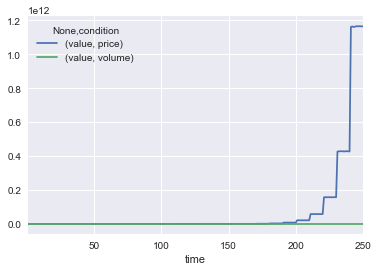

In [328]:
# Plot the average value by condition and date
ax = df.groupby(["condition", "time"]).mean().unstack("condition").plot()
# Get a reference to the x-points corresponding to the dates and the the colors
x = np.arange(len(df.time.unique()))
palette = sns.color_palette()

"""# Calculate the 25th and 75th percentiles of the data
# and plot a translucent band between them
for cond, cond_df in df.groupby("condition"):
    low = cond_df.groupby("time").value.apply(np.percentile, 25)
    high = cond_df.groupby("time").value.apply(np.percentile, 75)
    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))"""


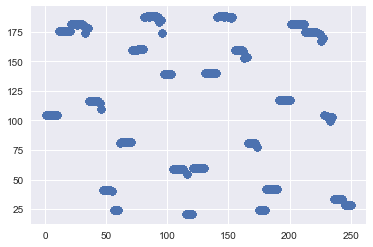

In [322]:
plt.scatter(y=transactions.price,x=transactions.time)